In [ ]:
#임규현
#Project 1

In [2]:
# 구글 드라이브 마운팅 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# CSV파일 가져오기 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vgames2.csv")

# 데이터와 상관 없는 Column drop 하기. 
df= df.drop(columns=['Unnamed: 0'])

# 데이터 확인 
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [24]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [29]:
df.sum()

Name           Candace Kane's Candy FactoryThe MunchablesOtom...
Platform       DSWiiPSPDSPS3DSPCPSPPS3PS3PSGBAPCDSDSPS3PCPS3P...
Year                                                   3.256e+07
NA_Sales                                             4.39295e+09
EU_Sales                                             2.43413e+09
JP_Sales                                             1.29102e+09
Other_Sales                                           7.9775e+08
Total                                                8.91585e+09
dtype: object

In [4]:
#결측값 확인 
df.isnull().sum()

#결측값 0으로 채우기 
df=df.fillna(0) 


In [5]:
# 데이터 속의 M과 K를 변환해주는 함수 정의 (M -> 백만, K -> 천 등) 
# 그냥 숫자들은 *백만 후 출력 

def value_to_float(x):
    if type(x) == float or type(x) == int or type(x) == object:
        return float(x)
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000     # K는 1000 으로 변환
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000  # M은 1000000 으로 변환 
        return 1000000.0
    return float(x) * 1000000  # 그외 일반 소숫점 숫자들은 * 1000000


In [6]:
df5_ = df 

In [7]:
# 데이터 변환 진행 
df5_['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df5_['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df5_['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df5_['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [8]:
# Q1. 지역에 따라서 선호하는 게임 장르가 다를까? 
# 결론: 지역에 따라서 선호하는 게임 장르는 다르다. 

# 장르와 각 지역별 판매량으로 새로운 데이터프레임 정의 
df2= df.drop(columns=['Name','Platform','Year','Publisher'])
df2

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40000.0,0.0,0.0,0.0
1,Action,170000.0,0.0,0.0,10000.0
2,Adventure,0.0,0.0,20000.0,0.0
3,Misc,40000.0,0.0,0.0,0.0
4,Platform,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...
16593,Platform,150000.0,40000.0,0.0,10000.0
16594,Action,10000.0,0.0,0.0,0.0
16595,Sports,440000.0,190000.0,30000.0,130000.0
16596,Action,50000.0,50000.0,250000.0,30000.0


In [9]:
# 총 판매량 구하기 
df2['Total'] = df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']

In [10]:
df['Total'] = df2['Total'] 

In [11]:
df6_= df2

In [12]:
df6_

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Action,40000.0,0.0,0.0,0.0,40000.0
1,Action,170000.0,0.0,0.0,10000.0,180000.0
2,Adventure,0.0,0.0,20000.0,0.0,20000.0
3,Misc,40000.0,0.0,0.0,0.0,40000.0
4,Platform,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...
16593,Platform,150000.0,40000.0,0.0,10000.0,200000.0
16594,Action,10000.0,0.0,0.0,0.0,10000.0
16595,Sports,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Action,50000.0,50000.0,250000.0,30000.0,380000.0


In [15]:
df7_ = df6_

In [16]:
df7Genre = df7_.groupby('Genre').sum()


In [17]:
df6Genre = df7Genre
df6Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Genre,,,,,
0,20610000.0,13120000.0,12880000.0,5540000.0,5.215000e+07
Action,874810000.0,522160000.0,157900000.0,186450000.0,1.741320e+09
Adventure,105660000.0,64050000.0,51950000.0,16810000.0,2.384700e+08
Fighting,223200000.0,101220000.0,87340000.0,36640000.0,4.484000e+08
Misc,408050000.0,212360000.0,105270000.0,74040000.0,7.997200e+08
Platform,446440000.0,201610000.0,130650000.0,51530000.0,8.302300e+08
Puzzle,123350000.0,50730000.0,56870000.0,12520000.0,2.434700e+08
Racing,357190000.0,237100000.0,56400000.0,77100000.0,7.277900e+08
Role-Playing,319540000.0,183580000.0,344950000.0,56960000.0,9.050300e+08


In [18]:
# 장르가 없는 Column 은 드랍한다. 

df6Genre = df6Genre.drop(df6Genre.index[0])
df6Genre = df6Genre.sort_values('Total',ascending=True)

Text(0.5, 1.0, 'Global Total Sales for each Genre')

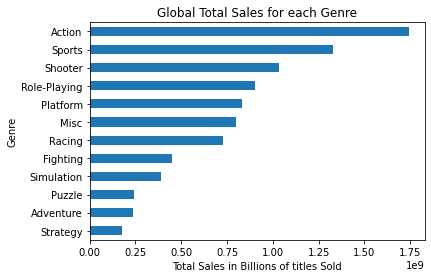

In [46]:
# 장르별 토탈 판매량 그래프 

df6Genre['Total'].plot.barh()
plt.xlabel('Total Sales in Billions of titles Sold')
plt.title('Global Total Sales for each Genre')

In [47]:
# 북미 TOP 5 출고량 데이터 

NA5 = df6Genre.drop(columns=['EU_Sales','JP_Sales','Other_Sales','Total'])
NA5 = NA5.sort_values('NA_Sales',ascending=True)
NA5

,NA_Sales
Genre,
Strategy,68700000.0
Adventure,105660000.0
Puzzle,123350000.0
Simulation,182960000.0
Fighting,223200000.0
Role-Playing,319540000.0
Racing,357190000.0
Misc,408050000.0
Platform,446440000.0


Text(0.5, 1.0, 'NA Sales for each Genre')

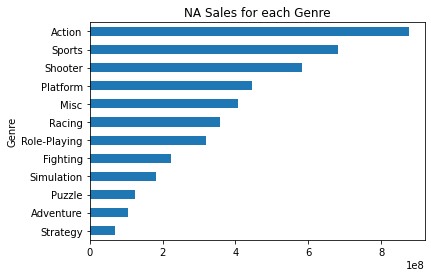

In [52]:
NA5['NA_Sales'].plot.barh()
plt.title('NA Sales for each Genre')

In [53]:
# 유럽 TOP 5 출고량 데이터 

EU5 = df6Genre.drop(columns=['NA_Sales','JP_Sales','Other_Sales', 'Total'])
EU5 = EU5.sort_values('EU_Sales',ascending=True)
EU5

,EU_Sales
Genre,
Strategy,45320000.0
Puzzle,50730000.0
Adventure,64050000.0
Fighting,101220000.0
Simulation,113350000.0
Role-Playing,183580000.0
Platform,201610000.0
Misc,212360000.0
Racing,237100000.0


Text(0.5, 1.0, 'EU Sales for each Genre')

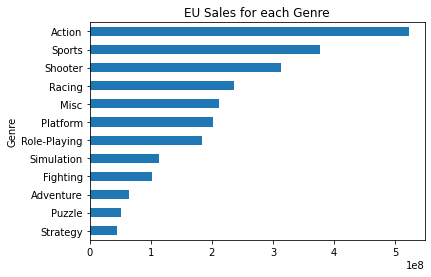

In [54]:
EU5['EU_Sales'].plot.barh()
plt.title('EU Sales for each Genre')

In [61]:

# 일본 TOP 5 출고량 데이터 
JP5 = df6Genre.drop(columns=['NA_Sales','Other_Sales','EU_Sales','Total'])
JP5 = JP5.sort_values('JP_Sales',ascending=True)
JP5

,JP_Sales
Genre,
Shooter,38280000.0
Strategy,49460000.0
Adventure,51950000.0
Racing,56400000.0
Puzzle,56870000.0
Simulation,63700000.0
Fighting,87340000.0
Misc,105270000.0
Platform,130650000.0


Text(0.5, 1.0, 'JP Sales for each Genre')

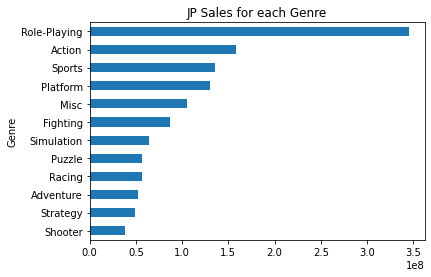

In [63]:
JP5['JP_Sales'].plot.barh()
plt.title('JP Sales for each Genre')

In [59]:
# 그 외 TOP 5 출고량 데이터 

OTHER5 = df6Genre.drop(columns=['NA_Sales','JP_Sales','EU_Sales','Total'])
OTHER5 = OTHER5.sort_values('Other_Sales',ascending=True)
OTHER5

,Other_Sales
Genre,
Strategy,11360000.0
Puzzle,12520000.0
Adventure,16810000.0
Simulation,31480000.0
Fighting,36640000.0
Platform,51530000.0
Role-Playing,56960000.0
Misc,74040000.0
Racing,77100000.0


Text(0.5, 1.0, 'Other Sales for each Genre')

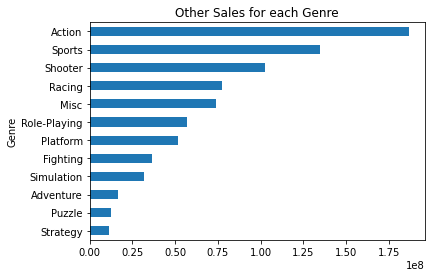

In [60]:
OTHER5['Other_Sales'].plot.barh()
plt.title('Other Sales for each Genre')

In [ ]:
#북미 - 액션,스포츠, 슈터, 레이싱, MISC
#유럽 - 액션,스포츠, 슈터, 레이싱, MISC 
#일본 - 롤플레잉, 액션, 스포츠, 플랫폼, MISC 
#그 외 - 액션,스포츠, 슈터, 레이싱, MISC 

#일단 일본을 제외한 모든 지역들의 경우 TOP5 선호도가 일치한 것으로 파악됩니다. 
#그렇다면 지역에 따라서 선호하는 게임 장르가 다른가 아닌가? 이 질문에 답하기 위해 조금 더 통계학적인 접근을 해보기로 하겠습니다. 

# 게임 출고 분포에 대해 파악해보겠습니다. (F-Stat); 지역별 sales 에 연관이 있는지?? 

In [ ]:
df7Genre = df6Genre.transpose()
df7Genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,8.748100e+08,105660000.0,223200000.0,408050000.0,446440000.0,123350000.0,357190000.0,319540000.0,5.819200e+08,182960000.0,6.805200e+08,68700000.0
EU_Sales,5.221600e+08,64050000.0,101220000.0,212360000.0,201610000.0,50730000.0,237100000.0,183580000.0,3.130500e+08,113350000.0,3.764800e+08,45320000.0
JP_Sales,1.579000e+08,51950000.0,87340000.0,105270000.0,130650000.0,56870000.0,56400000.0,344950000.0,3.828000e+07,63700000.0,1.353700e+08,49460000.0
Other_Sales,1.864500e+08,16810000.0,36640000.0,74040000.0,51530000.0,12520000.0,77100000.0,56960000.0,1.026500e+08,31480000.0,1.346700e+08,11360000.0
Total,1.741320e+09,238470000.0,448400000.0,799720000.0,830230000.0,243470000.0,727790000.0,905030000.0,1.035900e+09,391490000.0,1.327040e+09,174840000.0


In [ ]:
NA_Sales = np.array([874810000.0,	105660000.0,	223200000.0,	408050000.0,	446440000.0,	123350000.0,	357190000.0,	319540000.0,	581920000.0,	182960000.0,	680520000.0,	68700000.0])
EU_Sales = np.array([522160000.0,	64050000.0,	101220000.0,	212360000.0,	201610000.0,	50730000.0,	237100000.0,	183580000.0,	313050000.0,	113350000.0,	376480000.0,	45320000.0])
JP_Sales = np.array([157900000.0,	51950000.0,	87340000.0,	105270000.0,	130650000.0,	56870000.0,	56400000.0,	344950000.0,	38280000.0,	63700000.0,	135370000.0,	49460000.0])
Other_Sales = np.array([186450000.0,	16810000.0,	36640000.0,	74040000.0,	51530000.0,	12520000.0,	77100000.0,	56960000.0,	102650000.0,	31480000.0,	134670000.0,	11360000.0])

In [ ]:
# F-Stat by Scipy 로 가설검정 시행 
# 지역별로 선호하는 장르에 차이가 있나 없나? 

# H0: 지역별 출고량의 분포에 차이가 없다. 
# Ha: 지역별 출고량의 분포에 차이가 있다.

#P-value 가 유의 수준 0.05 p-value 보다 작기 때문에 귀무가설을 버리고 대립 가설을 채택합니다. 
#즉 지역별 출고량의 분포에 차이가 있다~ 즉 지역에 따라서 선호하는 게임 장르가 다르다라는 결론에 도달하게 됩니다. 
#이 경우에는 북미, 유럽, 그외의 경우 선호하는 게임 장르가 비슷하지만, 일본의 경우에는 출고량만 봐도 선호도가 다르다는 걸 한 눈에 파악할 수 있습니다. 

from scipy.stats import f_oneway
f_oneway(NA_Sales, EU_Sales, JP_Sales,Other_Sales) 

F_onewayResult(statistic=9.055483346936597, pvalue=8.756119956631937e-05)

In [ ]:
# 장르와 지역별 판매량의 상관관계?
# 이 내용 같은 경우에는 발표에는 포함하지 않았습니다. 
 
# '장르' 와 '지역' 에 대한 Chi-Square 검정 시행. 

#x**2, p-value, degrees of freedom 
#장르와 지역별 매출은 연관 관계가 있다? 
#H0: 장르와 지역은 출고량은 연관 관계가 없다. 
#Ha: 장르와 지역별 출고량은 연관 관계가 있다.

df6Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Genre,,,,,
Strategy,68700000.0,45320000.0,49460000.0,11360000.0,1.748400e+08
Adventure,105660000.0,64050000.0,51950000.0,16810000.0,2.384700e+08
Puzzle,123350000.0,50730000.0,56870000.0,12520000.0,2.434700e+08
Simulation,182960000.0,113350000.0,63700000.0,31480000.0,3.914900e+08
Fighting,223200000.0,101220000.0,87340000.0,36640000.0,4.484000e+08
Racing,357190000.0,237100000.0,56400000.0,77100000.0,7.277900e+08
Misc,408050000.0,212360000.0,105270000.0,74040000.0,7.997200e+08
Platform,446440000.0,201610000.0,130650000.0,51530000.0,8.302300e+08
Role-Playing,319540000.0,183580000.0,344950000.0,56960000.0,9.050300e+08


In [ ]:
df6Genre_ = df6Genre.drop(columns=['Total'])
df6Genre_

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Strategy,68700000.0,45320000.0,49460000.0,11360000.0
Adventure,105660000.0,64050000.0,51950000.0,16810000.0
Puzzle,123350000.0,50730000.0,56870000.0,12520000.0
Simulation,182960000.0,113350000.0,63700000.0,31480000.0
Fighting,223200000.0,101220000.0,87340000.0,36640000.0
Racing,357190000.0,237100000.0,56400000.0,77100000.0
Misc,408050000.0,212360000.0,105270000.0,74040000.0
Platform,446440000.0,201610000.0,130650000.0,51530000.0
Role-Playing,319540000.0,183580000.0,344950000.0,56960000.0


In [ ]:
import numpy as np
from scipy.stats import chisquare  
from scipy import stats

stats.chi2_contingency(df6Genre_, correction= False)


(696795976.1665444,
 0.0,
 33,
 array([[8.62461416e+07, 4.77553830e+07, 2.52118187e+07, 1.56266566e+07],
        [1.17633936e+08, 6.51351303e+07, 3.43872250e+07, 2.13137086e+07],
        [1.20100367e+08, 6.65008185e+07, 3.51082218e+07, 2.17605931e+07],
        [1.93116575e+08, 1.06930650e+08, 5.64526133e+07, 3.49901613e+07],
        [2.21189487e+08, 1.22474913e+08, 6.46589997e+07, 4.00766005e+07],
        [3.59008690e+08, 1.98786835e+08, 1.04946863e+08, 6.50476117e+07],
        [3.94490759e+08, 2.18433624e+08, 1.15319124e+08, 7.14764919e+07],
        [4.09540918e+08, 2.26767054e+08, 1.19718647e+08, 7.42033810e+07],
        [4.46438719e+08, 2.47197748e+08, 1.30504760e+08, 8.08887729e+07],
        [5.10995070e+08, 2.82943270e+08, 1.49376133e+08, 9.25855274e+07],
        [6.54610385e+08, 3.62464559e+08, 1.91358339e+08, 1.18606717e+08],
        [8.58968951e+08, 4.75620016e+08, 2.51097256e+08, 1.55633778e+08]]))

In [ ]:
 #연관이 있다는 결론. 

In [ ]:
df2_ =  df2.drop(columns=['Genre'])
df2_


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
...,...,...,...,...
16593,0.15,0.04,0,0.01
16594,0.01,0,0,0
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [ ]:
# K, M 등이 1000, 1000000 등으로 제대로 변경된 숫자들로 변경 
# Apply 함수를 통해 값들을 변환 

df2_['NA_Sales'] = df2_['NA_Sales'].apply(value_to_float)
df2_['EU_Sales'] = df2_['EU_Sales'].apply(value_to_float)
df2_['JP_Sales'] = df2_['JP_Sales'].apply(value_to_float)
df2_['Other_Sales'] = df2_['Other_Sales'].apply(value_to_float)


In [ ]:
# 원래 데이터셋에 적용

df2['NA_Sales'] = df2_['NA_Sales']
df2['EU_Sales'] = df2_['EU_Sales'] 
df2['JP_Sales'] = df2_['JP_Sales'] 
df2['Other_Sales'] = df2_['Other_Sales']  

In [ ]:
df2_['NA_Sales']

0         40000.0
1        170000.0
2             0.0
3         40000.0
4        120000.0
           ...   
16593    150000.0
16594     10000.0
16595    440000.0
16596     50000.0
16597         0.0
Name: NA_Sales, Length: 16598, dtype: float64

In [ ]:
# df3는 북아메리카 지역에 대한 세일즈 데이터입니다. 
# df4는 유럽. 
# df5는 일본. 
# df6는 그 외 지역들. 

df3= df2.drop(columns=['EU_Sales','JP_Sales','Other_Sales'])
df3

,Genre,NA_Sales
0,Action,40000.0
1,Action,170000.0
2,Adventure,0.0
3,Misc,40000.0
4,Platform,120000.0
...,...,...
16593,Platform,150000.0
16594,Action,10000.0
16595,Sports,440000.0
16596,Action,50000.0


In [ ]:
df4= df2.drop(columns=['NA_Sales','JP_Sales','Other_Sales'])
df5= df2.drop(columns=['NA_Sales','EU_Sales','Other_Sales'])
df6= df2.drop(columns=['NA_Sales','EU_Sales','JP_Sales'])

In [ ]:
# 각 지역별 장르 판매량 
NA_Sum = df3.groupby('Genre').sum()
NA_Sum

EU = df4.groupby('Genre').sum()
JP = df5.groupby('Genre').sum()
Other = df6.groupby('Genre').sum()

In [ ]:
# 북미 TOP 5 출고량 데이터 
NA = NA_Sum.sort_values('NA_Sales',ascending=False)
NA.head(5)

,NA_Sales
Genre,
Action,874810000.0
Sports,680520000.0
Shooter,581920000.0
Platform,446440000.0
Misc,408050000.0


In [ ]:
# 유럽, 일본, 그 외 지역들의 TOP 5 출고량 데이터 

EU=EU.sort_values('EU_Sales',ascending=False)
JP = JP.sort_values('JP_Sales',ascending=False)
Other = Other.sort_values('Other_Sales',ascending=False)

In [ ]:
EU.head(5)

,EU_Sales
Genre,
Action,522160000.0
Sports,376480000.0
Shooter,313050000.0
Racing,237100000.0
Misc,212360000.0


In [ ]:
df2

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,40000.0,0.0,0.0,0.0
1,Action,170000.0,0.0,0.0,10000.0
2,Adventure,0.0,0.0,20000.0,0.0
3,Misc,40000.0,0.0,0.0,0.0
4,Platform,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...
16593,Platform,150000.0,40000.0,0.0,10000.0
16594,Action,10000.0,0.0,0.0,0.0
16595,Sports,440000.0,190000.0,30000.0,130000.0
16596,Action,50000.0,50000.0,250000.0,30000.0


In [ ]:
# 장르만 뺀 데이터셋 만들기 
newdf2 = df2.groupby('Genre').sum()
newdf3 = newdf2.reset_index()
newdf3 = newdf3.drop(columns=['Genre'])

In [ ]:
# 아예 장르가 없는 (0) 데이터는 제외하기 
newdf2 = newdf2.drop(newdf2.index[0])
newdf2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874810000.0,522160000.0,157900000.0,186450000.0
Adventure,105660000.0,64050000.0,51950000.0,16810000.0
Fighting,223200000.0,101220000.0,87340000.0,36640000.0
Misc,408050000.0,212360000.0,105270000.0,74040000.0
Platform,446440000.0,201610000.0,130650000.0,51530000.0
Puzzle,123350000.0,50730000.0,56870000.0,12520000.0
Racing,357190000.0,237100000.0,56400000.0,77100000.0
Role-Playing,319540000.0,183580000.0,344950000.0,56960000.0
Shooter,581920000.0,313050000.0,38280000.0,102650000.0


In [ ]:
# 데이터셋 확인 ; 각 지역별 장르에 대한 데이터 
newdf3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,20610000.0,13120000.0,12880000.0,5540000.0
1,874810000.0,522160000.0,157900000.0,186450000.0
2,105660000.0,64050000.0,51950000.0,16810000.0
3,223200000.0,101220000.0,87340000.0,36640000.0
4,408050000.0,212360000.0,105270000.0,74040000.0
5,446440000.0,201610000.0,130650000.0,51530000.0
6,123350000.0,50730000.0,56870000.0,12520000.0
7,357190000.0,237100000.0,56400000.0,77100000.0
8,319540000.0,183580000.0,344950000.0,56960000.0
9,581920000.0,313050000.0,38280000.0,102650000.0


In [ ]:
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [ ]:
# 장르가 정해지지 않은 데이터 제외 
newdf3 = newdf3.drop(newdf3.index[0])

In [ ]:
##Q2. 연도별 게임의 트렌드가 있을까? 

In [29]:
# 장르와 연도만 남겨보기 

df_ = df.drop(columns=['Name','Platform','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total'])
df_

,Year,Genre
0,2008.0,Action
1,2009.0,Action
2,2010.0,Adventure
3,2010.0,Misc
4,2010.0,Platform
...,...,...
16593,2006.0,Platform
16594,2005.0,Action
16595,2015.0,Sports
16596,2013.0,Action


In [30]:
df9 = df_

In [26]:
# 연도 관련 데이터를 고쳐주는 함수 

def CorrectYear(x):
    if x<21:
        return x + 2000 
    if 100>x>21:
        return x + 1900
    return x


In [33]:
# 기존에 있던 값들을 고쳐주는 과정 
df9['Year'] = df9['Year'].apply(CorrectYear)

In [ ]:
# Year 에 있는 값들이 깔끔하게 정리되었나 확인 
df9['Year'].value_counts()

In [35]:
# 주요 연도별 데이터  정리
# 1980년도 부터 시작해서 85년.. 90... 2020년까지
# 보통 트렌드가 바뀌기에는 5년 정도가 걸린다고 가정고 5년 주기로 계산 

df1980 = df9.loc[df9['Year'] == 1980]
df1985 = df9.loc[df9['Year'] == 1985]
df1990 = df9.loc[df9['Year'] == 1990]
df1995 = df9.loc[df9['Year'] == 1995]
df2000 = df9.loc[df9['Year'] == 2000]
df2005 = df9.loc[df9['Year'] == 2005]
df2010 = df9.loc[df9['Year'] == 2010]
df2015 = df9.loc[df9['Year'] == 2015]
df2020 = df9.loc[df9['Year'] == 2020]

#########################################
df2001 = df9.loc[df9['Year'] == 2001]
df2002 = df9.loc[df9['Year'] == 2002]
df2003 = df9.loc[df9['Year'] == 2003]
df2004 = df9.loc[df9['Year'] == 2004]

df2011 = df9.loc[df9['Year'] == 2011]
df2012 = df9.loc[df9['Year'] == 2012]
df2013 = df9.loc[df9['Year'] == 2013]
df2014 = df9.loc[df9['Year'] == 2014]
df2008 = df9.loc[df9['Year'] == 2008]
df2008 = df9.loc[df9['Year'] == 2008]
df2009 = df9.loc[df9['Year'] == 2009]
df2016 = df9.loc[df9['Year'] == 2016]
df2017 = df9.loc[df9['Year'] == 2017]
#########################################

In [ ]:
df2016

In [ ]:
df2017

In [ ]:
# 1980년 게임 장르별 트렌드 (장르별 출시된 게임의 수)
df1980['Genre'].value_counts()

In [ ]:
df1985['Genre'].value_counts()

In [ ]:
df1990['Genre'].value_counts()

In [ ]:
df1995['Genre'].value_counts()

In [ ]:
df2000['Genre'].value_counts()

In [ ]:
df2003['Genre'].value_counts()

In [ ]:
df2005['Genre'].value_counts()

In [ ]:
df2010['Genre'].value_counts()

In [ ]:
df2015['Genre'].value_counts()

In [ ]:
df2016['Genre'].value_counts()

In [ ]:
df2020['Genre'].value_counts()

Simulation    1
Name: Genre, dtype: int64

In [ ]:
#df['Genre'].value_counts()

In [ ]:
#df_genre = df.groupby('Genre').sum()
#df_genre

In [36]:
df['Year'] = df9['Year']

In [37]:
df_year = df.groupby('Year').sum().reset_index()

In [ ]:
df_year

Text(0.5, 1.0, 'Total Game Sales per year')

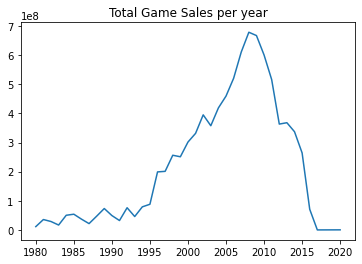

In [41]:
# 연도별 게임 총 판매량 데이터 

import matplotlib.pyplot as plt
plt.plot(df_year['Year'], df_year['Total'])
plt.title('Total Game Sales per year')

In [ ]:
# 일단 액션 게임의 경우에는 거의 2000년대 들어서야 시장의 강자로 자리 잡았습니다. 
# 80년대~90년대 초반에 대해서는 충분한 데이터가 없었습니다.
# 90년부터 2000년대 초반까지는 스포츠 게임이 강자였습니다. 
# 2003년 이후로는 액션 게임이 가장 많이 출시되기 시작하였고, 액션 게임이 게임시장을 지배하기 시작했습니다. 

In [67]:
# CSV파일 가져오기 
Genredf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Genre_Trend.csv")

In [68]:
Genredf

,Year,Misc,Shooter,Action,Fighting,Platform,Puzzle,Simulation,Sports,Role-Playing,Racing,Adventure,Strategy
0,1980,4,2,1,1,0,0,0,0,0,0,0,0
1,1985,0,1,2,1,4,4,1,1,0,0,0,0
2,1990,0,0,3,0,3,1,1,3,2,2,0,0
3,1995,22,29,8,29,13,12,14,29,24,12,13,0
4,2000,49,48,106,41,34,23,31,123,46,66,26,26
5,2005,115,96,192,43,82,32,38,122,71,77,42,29
6,2010,200,81,226,40,31,45,81,185,103,57,153,53
7,2015,39,34,253,21,14,6,15,62,78,19,53,17
8,2016,18,32,119,14,10,0,9,38,40,20,34,10
9,2020,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import numpy as np
import matplotlib 



Text(0.5, 1.0, 'Sales trend for individual Genre')

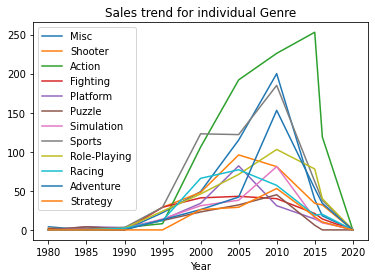

In [45]:
# 장르별 매출 추이 
# Action이 원탑 
# 어드벤처의 점진적인 상승 
Genredf.plot.line(x='Year')
plt.title('Sales trend for individual Genre')

In [ ]:
#Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
# 일단 출고량이 높은 게임들로는 어떤 게임들이 있는지.

# 일단 전체 출고량부터 파악 

df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [ ]:
# 총 판매량 구하기 
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [73]:
# 총 판매량 순으로 정리하고 판매량 Global Top 10 게임 보여주기 

dftotal = df.sort_values('Total',ascending=False)
TOP10 = dftotal.head(10)
TOP10 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


In [ ]:
dftotal

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...,...,...,...,...,...
14265,Nitroplus Blasterz: Heroines Infinite Duel,PS3,2015.0,Fighting,Nitroplus,0.0,0.0,10000.0,0.0,10000.0
2311,Shinseiki Evangelion: Koutetsu no Girlfriend 2...,PSP,2009.0,Adventure,CyberFront,0.0,0.0,10000.0,0.0,10000.0
11376,Rail Simulator,PC,2007.0,Simulation,Electronic Arts,0.0,10000.0,0.0,0.0,10000.0
3571,Hyperdimension Neptunia mk2,PS3,2011.0,Action,Nippon Ichi Software,0.0,10000.0,0.0,0.0,10000.0


In [ ]:
Global5 = TOP20.head(5)
Global5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


In [ ]:
# 이름으로 인덱스 설정하기 
TOP10.set_index('Name',inplace=True,drop=True)
Ans = TOP10 

# Top 20 게임들의 평균 Sales 
Ans['Average'] = Ans['Total'] / 4 

In [75]:
Ans

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Average
Name,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0,20685000.0
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0,10060000.0
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0,8957500.0
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0,8250000.0
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0,7845000.0
Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0,7565000.0
New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0,7502500.0
Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0,7252500.0
New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0,7152500.0


In [ ]:
WiiSports= (41490000.0,	29020000.0,	3770000.0,	8460000.0)
data1= (29080000.0,	3580000.0,	6810000.0,	770000.0)
data2= (15850000.0,	12880000.0,	3790000.0,	3310000.0)
data3= (15750000.0,	11010000.0,	3280000.0,	2960000.0)	
data4= (1270000.0,	8890000.0,	10220000.0,	1000000.0)

In [ ]:
data = [WiiSports, data1, data2, data3, data4]

(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

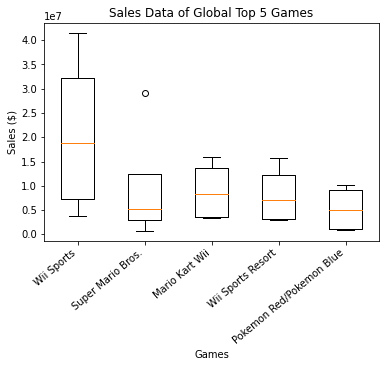

In [ ]:
# Label 1 2 3 4 5 한다 
# Interpretation 은 어떻게 하는게 좋을까? 
# 글로벌 출고량 Top 5 게임들에 대한 박스 플랏 

plt.boxplot(data)
plt.title('Sales Data of Global Top 5 Games')
plt.ylabel('Sales ($)')
plt.xlabel('Games')
plt.xticks([1, 2, 3, 4, 5], ['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii','Wii Sports Resort','Pokemon Red/Pokemon Blue'])
#plt.figure(figsize=(4,4))

plt.xticks(
    rotation=40, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)


(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

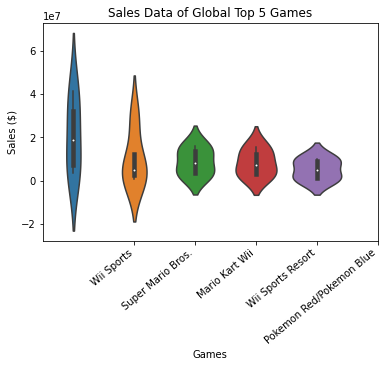

In [ ]:
sns.violinplot(data=data)
plt.title('Sales Data of Global Top 5 Games')
plt.ylabel('Sales ($)')
plt.xlabel('Games')
plt.xticks([1, 2, 3, 4, 5], ['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii','Wii Sports Resort','Pokemon Red/Pokemon Blue'])
plt.xticks(
    rotation=40, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)

In [78]:
Ans_ = Ans.reset_index()

In [79]:
Ans_ = Ans_.head(10)

In [ ]:
Ans_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Genre Distribution for Global Top 10 Games')

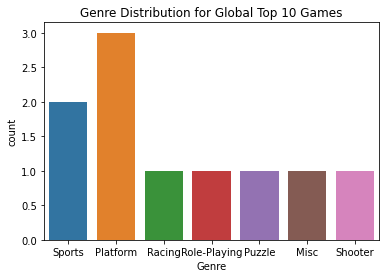

In [80]:
# 글로벌 출고량 Top 10 게임들의 장르 분포도 
import seaborn as sns
sns.countplot(Ans_['Genre'])
plt.title('Genre Distribution for Global Top 10 Games')

In [81]:
dftotal1 = dftotal.groupby('Genre').sum()
dftotal1

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Genre,,,,,,
0,100301.0,20610000.0,13120000.0,12880000.0,5540000.0,5.215000e+07
Action,6481945.0,874810000.0,522160000.0,157900000.0,186450000.0,1.741320e+09
Adventure,2542424.0,105660000.0,64050000.0,51950000.0,16810000.0,2.384700e+08
Fighting,1662060.0,223200000.0,101220000.0,87340000.0,36640000.0,4.484000e+08
Misc,3402377.0,408050000.0,212360000.0,105270000.0,74040000.0,7.997200e+08
Platform,1735533.0,446440000.0,201610000.0,130650000.0,51530000.0,8.302300e+08
Puzzle,1120973.0,123350000.0,50730000.0,56870000.0,12520000.0,2.434700e+08
Racing,2426113.0,357190000.0,237100000.0,56400000.0,77100000.0,7.277900e+08
Role-Playing,2926353.0,319540000.0,183580000.0,344950000.0,56960000.0,9.050300e+08


In [ ]:
dftotal1 

NameError: ignored

In [20]:
df25 = dftotal.head(25)

In [ ]:
df25

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


In [ ]:
#좀 더 깔끔한 시각화가 필요하다 
#판매량 상위 25개 게임의 장르 분포도 그래프 

sns.countplot(df25['Genre'])
plt.xticks(
    rotation=40, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Who are the publishers of Top 25 Games?')

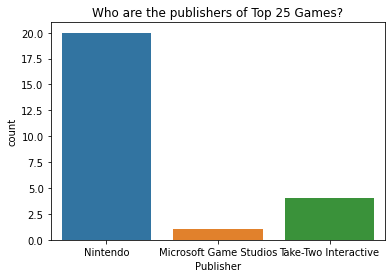

In [40]:
# 상위 25개 게임의 출시 회사 
# 닌텐도가 앞도적으로 많다 

sns.countplot(df25['Publisher'])
plt.title('Who are the publishers of Top 25 Games?')

In [ ]:
df_publisher = dftotal.groupby('Publisher').sum()
df_publisher.head(10)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Publisher,,,,,,
0,116245.0,8540000.0,4680000.0,930000.0,670000.0,14820000.0
10TACLE Studios,6020.0,70000.0,40000.0,0.0,0.0,110000.0
1C Company,6031.0,10000.0,70000.0,0.0,20000.0,100000.0
20th Century Fox Video Games,9907.0,1820000.0,100000.0,0.0,10000.0,1930000.0
2D Boy,2008.0,0.0,30000.0,0.0,10000.0,40000.0
3DO,72018.0,6480000.0,3040000.0,0.0,630000.0,10150000.0
49Games,2009.0,0.0,40000.0,0.0,0.0,40000.0
505 Games,385693.0,31830000.0,16430000.0,2050000.0,5440000.0,55750000.0
5pb,122717.0,20000.0,0.0,1610000.0,0.0,1630000.0


In [ ]:
publisher_dat = df_publisher.sort_values('Total',ascending=False)
publisher_dat

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Publisher,,,,,,
Nintendo,1408666.0,816870000.0,418740000.0,455420000.0,95330000.0,1.786360e+09
Electronic Arts,2710562.0,595070000.0,371270000.0,14040000.0,129770000.0,1.110150e+09
Activision,1956979.0,429700000.0,215530000.0,6540000.0,75340000.0,7.271100e+08
Sony Computer Entertainment,1369034.0,265220000.0,187720000.0,74100000.0,80450000.0,6.074900e+08
Ubisoft,1849194.0,253430000.0,163320000.0,7500000.0,50260000.0,4.745100e+08
...,...,...,...,...,...,...
"Interworks Unlimited, Inc.",2012.0,10000.0,0.0,0.0,0.0,1.000000e+04
Interchannel-Holon,2007.0,0.0,0.0,10000.0,0.0,1.000000e+04
Genterprise,2009.0,0.0,0.0,10000.0,0.0,1.000000e+04


In [ ]:
publisher_dat10 = publisher_dat.head(10)

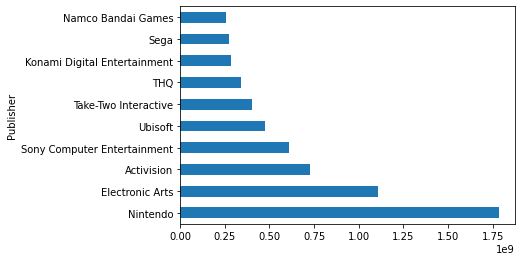

In [ ]:
# Global Top 10 Publisher 들의 게임 판매량  
publisher_dat10['Total'].plot.barh();

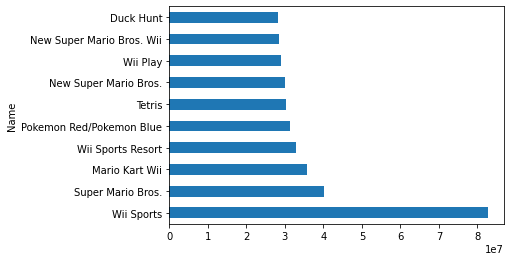

In [ ]:
$# 전체 출고량 (모든 지역에 걸친) Top 10 게임의 판매량 Box Plot 
# Wii Sports의 판매량이 독보적으로 높음 
# 그외 다른 게임들의 판매량은 비슷한 편입니다. 

Ans['Total'].plot.barh();

In [ ]:
# 그 다음으로는 지역별 출고량을 정리하고, 지역별 판매량 Top 10을 뽑아보겠습니다. 

# 북미
NAtotal =dftotal.sort_values('NA_Sales',ascending=False)

# 유럽 
EU = dftotal.sort_values('EU_Sales',ascending=False)

# 일본 
JPtotal =dftotal.sort_values('JP_Sales',ascending=False)

# 그외 
Othertotal =dftotal.sort_values('Other_Sales',ascending=False)

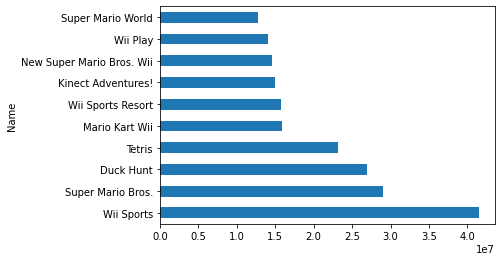

In [ ]:
# 북미 Top 10

NAtotal.head(10)
NAtop = NAtotal.head(10)
NAtop.set_index('Name',inplace=True,drop=True)
NAtop['NA_Sales'].plot.barh();

In [ ]:
NAtop

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Name,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0
Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0


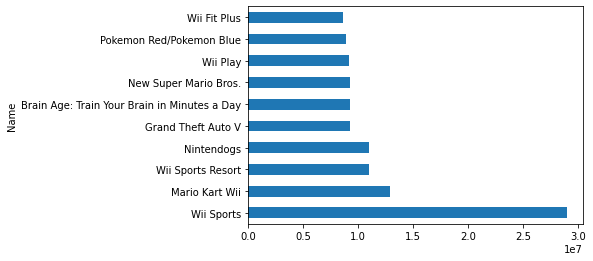

In [ ]:
# 유럽 Top 10 

EUtop = EU.head(10)
#EUtop.set_index('Name',inplace=True,drop=True)
EUtop['EU_Sales'].plot.barh();

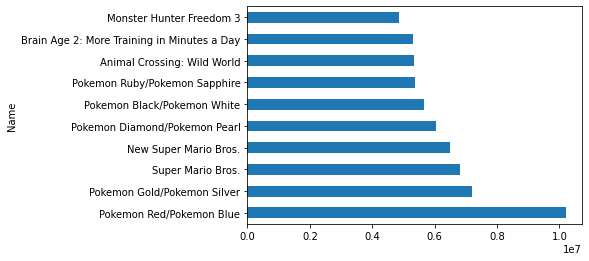

In [ ]:
#일본 Top 10 
# 하나의 게임이 인기가 많은 편이지만 다른 그룹과 아주 큰 차이가 있는 건 아님 

JPtop10 = JPtotal.head(10)
JPtop10.set_index('Name',inplace=True,drop=True)
JPtop10['JP_Sales'].plot.barh();

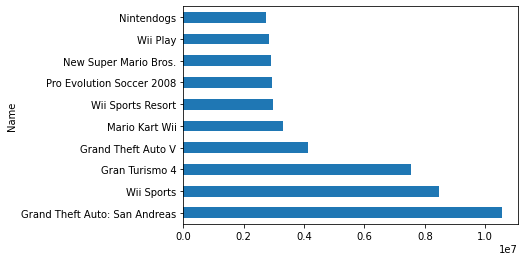

In [ ]:
# 그 외 Top5 

Othertop10 = Othertotal.head(10)
Othertop10.set_index('Name',inplace=True,drop=True)
Othertop10['Other_Sales'].plot.barh();

In [ ]:
pop1 = df.loc[(df.Name == 'Wii Sports')]
pop1 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0


In [ ]:
pop2 = df.loc[(df.Name == 'Pokemon Red/Pokemon Blue')]
pop2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0


In [ ]:
pop3 = df.loc[(df.Name == 'Grand Theft Auto: San Andreas')]
pop3 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3632,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,80000.0,30000.0,0.0,10000.0
6060,Grand Theft Auto: San Andreas,PC,2005.0,Action,Take-Two Interactive,0.0,920000.0,0.0,50000.0
10420,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1260000.0,610000.0,0.0,90000.0
14669,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9430000.0,400000.0,410000.0,10570000.0


In [ ]:
pop3sum = pop3.groupby('Name').sum()
pop3sum # 연도 데이터 수정하나 마나? 

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,
Grand Theft Auto: San Andreas,8022.0,10770000.0,1960000.0,410000.0,10720000.0


In [25]:
#Q4. 선택한 장르와 Total Sales 에 대한 상관계수 분석 

import scipy.stats
df6Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Genre,,,,,
Strategy,68700000.0,45320000.0,49460000.0,11360000.0,1.748400e+08
Adventure,105660000.0,64050000.0,51950000.0,16810000.0,2.384700e+08
Puzzle,123350000.0,50730000.0,56870000.0,12520000.0,2.434700e+08
Simulation,182960000.0,113350000.0,63700000.0,31480000.0,3.914900e+08
Fighting,223200000.0,101220000.0,87340000.0,36640000.0,4.484000e+08
Racing,357190000.0,237100000.0,56400000.0,77100000.0,7.277900e+08
Misc,408050000.0,212360000.0,105270000.0,74040000.0,7.997200e+08
Platform,446440000.0,201610000.0,130650000.0,51530000.0,8.302300e+08
Role-Playing,319540000.0,183580000.0,344950000.0,56960000.0,9.050300e+08


0.9240916641508188

In [38]:
x = [408050000.0,	212360000.0,	105270000.0,	74040000.0, 799720000.0] #MISC 
x1 = [680520000.0,	376480000.0,	135370000.0,	134670000.0,	13270400000.0] #Sports
x2 = [874810000.0,	522160000.0,	157900000.0,	186450000.0,	1741320000.0] #Action 
x3 = [105660000.0,	64050000.0,	51950000.0,	16810000.0,	238470000.0] #Adventure 
x4 = [319540000.0,	183580000.0,	344950000.0,	56960000.0,	905030000] #Role-Playing 
y = [4392950000, 2434130000, 1291020000, 797750000, 8915850000] #Total Sales 

In [36]:
# MISC 와 Total Sales의 상관관계 
cov2 = np.cov(x,y)[0,1].     #공분산 
cor2 = np.corrcoef(x,y)[0,1] #상관계수
cor2 #상관계수 

0.9995501000485616

In [34]:
# Sports 와 Total Sales의 상관관계
cov2 = np.cov(x1,y)[0,1]
cor2 = np.corrcoef(x1,y)[0,1]
cor2 #상관계수

0.9230521640531281

In [37]:
# Action 과 Total Sales의 상관관계 
cov2 = np.cov(x2,y)[0,1]
cor2 = np.corrcoef(x2,y)[0,1] 
cor2 #상관계수 

0.9964427305562199

In [39]:
# Adventure 와 Total Sales의 상관관계
cov2 = np.cov(x3,y)[0,1]       #공분산
cor2 = np.corrcoef(x3,y)[0,1]  #상관계수
cor2

0.992616099676239

In [44]:
# Role-Playing 과 Total Sales의 상관관계 
cov2 = np.cov(x4,y)[0,1]      #공분산 
cor2 = np.corrcoef(x4,y)[0,1] #상관관계 
cor2

0.9240916641508188